# Customer Data Pre-processing and Visualization App

This project is a comprehensive data pre-processing and visualization app designed to transform raw customer data into structured, clean formats suitable for analysis. The app efficiently cleans, structures, and visualizes data to enhance decision-making capabilities.

## Key Features
- **Import and clean CSV data**
- **Transform data into nested JSON formats**
- **Error handling and validation**
- **Export cleaned data**
- **Generate visualizations**

In [3]:
#Importing all the necessary libraries
import csv
import json
from datetime import datetime
import pandas as pd
import seaborn as sns

# Section 1 (Data Procesing)
<br>

## Task 1 (Read in the provided ACW Data using the CSV library)

### Step 1. Reading the provided ACW Data using CSV Library

In [4]:
#The below line of code creates an empty list to contain the csv data
acw_data = []

#The below block of code reads the CSV file
with open('acw_user_data.csv') as new_file:
    csv_reader = csv.reader(new_file, delimiter = ',')
    
    #The below line of code get the data header and stores in the header list
    acw_header = next(csv_reader) 
    
    #This loop runs through the read csv data and stores in the data list
    for row in csv_reader:
        acw_data.append(row) #append the rest of the data into the acw_data list       


## Task 2 Convert Nested Structures into Flat Structures

### Step 1. Inspect the read acw_header and acw_data

In [5]:
#Display the header list content
print (acw_header)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


In [6]:
#Display the data list content
print (acw_data) 

[['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup'], ['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe'], ['Studio 33K Joel walk', 'Randallborough', 'ME3N 1GH', '22', '16.02', 'Hill-Wright', '11/19', '07/27', '4091726363083888495', '422', '1', 'Antony', 'GB40CVUE84011545859591', 'Jones', 'married or civil partner', '0', 'False', '68049', 'Male', 'GMC', 'Achieva', '2015', 'Convertible, Coupe'], ['Studio 46S Bethany lights', 'East Reece', 'E10 9RJ', '56', '19.35', 'Green LLC', '10/17', '04/18', '4671332769487632633', '669', '2', 'Henry', 'GB40YPKK71613332239280', 'Shaw', '

### Step 2. Formatting the ACW Data rows to appropriate data types

In [7]:
#Function to format data into data types
#The following columns have been identified to require formatting: 
    #Age to integer 
    #Retired Status to boolean 
    #Commuted distance to float
    #Credit card number to integer
    #Credit card cvv to integer
    #Yearly Pension to integer
    #Yearly Salary to integer
    #Vehicle year to integer
def format_list_type(data, header):
    """
    Function formats some data into specified data types.

    Function parameters:
    - data: list of lists, the data to be formatted
    - header: list, the header containing column names

    Returns:
    - list of lists: the formatted data
    """
    
    #The below line of code loops through the extracted data list 
    for row_no, row in enumerate(data):
        
        #This below line of code converts the age column from string into integers after identification by matching the index of the age value in the header list against its corresponding location in the data list for each customer 
        row[header.index('Age (Years)')] = int(row[header.index('Age (Years)')])
        
        #The below block of code converts the data in the retired column into its respective boolean type after identification by matching the index of the Retired Status value in the header list against its corresponding location in the data list for each customer
        #The code also checks for attempts to reformat the data and leaves each cells as is once it identifies that it is a boolean
        try:
            #the try-pass handles cases where we are trying to re-format the data if the data has been previously formatted into boolean
            row[header.index('Retired')] = row[header.index('Retired')].lower() == 'true'
        except AttributeError:
            #This handles attribute exceptions that would occur if the same data containing boolean is reformatted
            #It identifies the cells in the data that has already been formatted into a boolean and leave as is
            pass
        
        #The below line of code converts the commuted distance column from string into floats after identification by matching its index in the header list against its corresponding location in the data list for each customer 
        row[header.index('Distance Commuted to Work (Km)')] = float(row[header.index('Distance Commuted to Work (Km)')])
        
        #The below line of code converts the credit card number column from string into integer after identification by matching its its index in the header list against its corresponding location in the data list for each customer 
        row[header.index('Credit Card Number')] = int(row[header.index('Credit Card Number')])
        
        #The below line of code converts the credit card cvv column from string into integer after identification by matching the its index in the header list against its corresponding location in the data list for each customer 
        row[header.index('Credit Card CVV')] = int(row[header.index('Credit Card CVV')])
        
        #The below block of code converts the data in the dependants column into integers after identification by matching its index in the header list against its corresponding location in the data list for each customer
        #The code handles errors in the dependants column such as empty cells that cannot be converted into integers by leaving as is
        #The code also handles attribut 
        try:
            #converts to interger if the dependant value is found to be digits and leave as it is if its not digits
            row[header.index('Dependants')] = int(row[header.index('Dependants')]) if row[header.index('Dependants')].isdigit() else row[header.index('Dependants')]
        except AttributeError:
            #Leave as is if you get an attribute error while running the code 
            pass
        
        #The below line of code converts the Yearly Pension column from string into integer after identification by matching the its index in the header list against its corresponding location in the data list for each customer 
        row[header.index('Yearly Pension (GBP)')] = int(row[header.index('Yearly Pension (GBP)')])
        
        #The below line of code converts the Yearly salary column from string into integer after identification by matching the its index in the header list against its corresponding location in the data list for each customer 
        row[header.index('Yearly Salary (GBP)')] = int(row[header.index('Yearly Salary (GBP)')])
        
        #The below line of code converts the Vehicle Year column from string into integer after identification by matching the its index in the header list against its corresponding location in the data list for each customer 
        row[header.index ('Vehicle Year')] = int(row[header.index('Vehicle Year')])
        
    #The below line of code returns the formatted data 
    return data

<br>

In [8]:
#Applying the data formatting function to the raw ACW data and storing the formatted data in a variable called 'formatted_list'. 
formatted_list = format_list_type(acw_data, acw_header)

#printing the contents of variable formatted_list.
print(formatted_list)

[['70 Lydia isle', 'Lake Conor', 'S71 7XZ', 89, 0.0, 'N/A', '08/18', '11/27', 676373692463, 875, 3, 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', 7257, True, 72838, 'Male', 'Hyundai', 'Bonneville', 2009, 'Pickup'], ['00 Wheeler wells', 'Chapmanton', 'L2 7BT', 46, 13.72, 'Begum-Williams', '08/12', '11/26', 4529436854129855, 583, 1, 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', 0, False, 54016, 'Male', 'Nissan', 'ATS', 1996, 'Coupe'], ['Studio 33K Joel walk', 'Randallborough', 'ME3N 1GH', 22, 16.02, 'Hill-Wright', '11/19', '07/27', 4091726363083888495, 422, 1, 'Antony', 'GB40CVUE84011545859591', 'Jones', 'married or civil partner', 0, False, 68049, 'Male', 'GMC', 'Achieva', 2015, 'Convertible, Coupe'], ['Studio 46S Bethany lights', 'East Reece', 'E10 9RJ', 56, 19.35, 'Green LLC', '10/17', '04/18', 4671332769487632633, 669, 2, 'Henry', 'GB40YPKK71613332239280', 'Shaw', 'married or civil partner', 0, False, 91337, 'Male', 'Scion', '

### Step 3. Converting the flat structures into nested structures

In [9]:
#This function extract the index of a column in a header list
def column_index(column_name, header):
    """
    Function gets the index of a column in the provided header.

    Parameters:
    - column_name: str, the name of the column
    - header: list, the header containing column names

    Returns:
    - int: the index of the specified column in the header

    Raises:
    - ValueError: If the column is not found in the header
    """
    
    try:
        #This try code returns the column index if the column is available in the column list
        return header.index(column_name)
    except ValueError:
        #This except code handles Value Errors that would arise from cases where the column for the column index requested is not in the header list
        raise ValueError(f"Column {column_name} not found in the header")

<br>

In [10]:
#This function extract personal details of the customers
# Personal details have been classified as first name, last name, age, marital status, pension, salary, sex, employer company, dependants and commute distanace
def personal_details_nest(row, header):
    """
    Function gets personal details of a customer from a provided row of data.

    Parameters:
    - row: list, a row of data
    - header: list, the header containing column names

    Returns:
    - dict: personal details of the customer
    """
    #The below block of code gets the index of each of the personal details using the column index function
    f_name_index = column_index('First Name', header) #Gets first name index
    l_name_index = column_index('Last Name', header) #Gets last name index
    age_index = column_index("Age (Years)", header) #Gets Age index
    m_status_index = column_index('Marital Status', header) #Get Marital status index
    y_pension_index = column_index('Yearly Pension (GBP)', header) #Gets yearly pension index
    retired_index = column_index('Retired', header) #Gets retired status index
    y_salary_index = column_index('Yearly Salary (GBP)', header) #Gets yearly salary index
    sex_index = column_index('Sex', header) #Gets Sex index
    company_index = column_index('Employer Company', header) #Gets the employer ccompany index
    dep_index = column_index('Dependants', header) #Get the number of dependants index
    distance_index = column_index('Distance Commuted to Work (Km)', header) #Gets commute distance index
    
    # The below block of code returns a dictionary that maps details in each of the personal details indexes in the header list against the matching index in data list and maps the information in that index in the data list.
    return {
        'first_name': row[f_name_index], # Extracts and maps the first name index from the header list against first name index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'last_name': row[l_name_index], # Extracts and maps the last name index from the header list against last name index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'age': row[age_index], #Extracts and maps the age index from the header list against age name index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'sex': row[sex_index], # Extracts and maps the sex index from the header list against sex index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'retired': row[retired_index], # Extracts and maps the retired status index from the header list against retired status index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'marital_status': row[m_status_index], # Extracts and maps the marital status index from the header list against marital status index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'dependants': row[dep_index], # Extracts and maps the dependants index from the header list against dependants index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'salary': row[y_salary_index], # Extracts and maps the salary index from the header list against salary index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'pension': row[y_pension_index], # Extracts and maps the pension index from the header list against pension index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'company': row[company_index], # Extracts and maps the empoyer company index from the header list against empoyer company index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
        'commute_distance': row[distance_index], # Extracts and maps the commute distance index from the header list against commute distance index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted detail
    }

<br>

In [11]:
#Function to get vehicle details of the customers
#Vehicle details have been classified as vehicle make, model, type and year
def vehicle_nest(row, header):
    """
    Function gets the vehicle details of a customer from the provided row of data.

    Parameters:
    - row: list, a row of data
    - header: list, the header containing column names

    Returns:
    - dict: vehicle details of the customer
    """
    #The below block of code gets the index of each of the vehicle details using the column index function
    make_index = column_index('Vehicle Make', header) #Gets the vehicle make index
    model_index = column_index('Vehicle Model', header) #Gets the vehicle model index
    year_index = column_index('Vehicle Year', header) #Gets the vehicle year index
    type_index = column_index('Vehicle Type', header) #Gets the vehicle type index
    
    # The below block of code returns a dictionary that maps details in each of the vehicle details indexes in the header list against the matching index in data list and maps the information in that index in the data list.
    return {
        'v_make': row[make_index], # Extracts and maps the vehicle make index from the header list against vehicle make index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
        'v_model': row[model_index], # Extracts and maps the vehicle  model index from the header list against vehicle model index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
        'v_year': row[year_index], # Extracts and maps the vehicle year index from the header list against vehicle year index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
        'v_type': row[type_index], # Extracts and maps the vehicle type index from the header list against vehicle type index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
    }

<br>

In [12]:
#Function to get credit card details of the customers
#Credit card details have been classified as credit card start date, credit card expiry date, CVV/security number , credit card number, IBAN
def credit_card_nest(row, header):
    """
    Function gets the credit card details of a customer from the provided row of data.

    Parameters:
    - row: list, a row of data
    - header: list, the header containing column names

    Returns:
    - dict: credit card details of the customer
    """
    #The below block of code gets the index of each of the vehicle details using the column index function
    start_date_index = column_index('Credit Card Start Date', header) # Gets the credit card start date index
    end_date_index = column_index('Credit Card Expiry Date', header) # Gets the credit card expiry date index
    cvv_index = column_index('Credit Card CVV', header) # Gets the credit card start CVV index
    number_index = column_index('Credit Card Number', header) # Gets the credit card number index
    IBAN_index = column_index('Bank IBAN', header) # Gets the IBAN index

    return {
        'start_date': row[start_date_index], # Extracts and maps the credit card start date index from the header list against credit card start date index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
        'end_date': row[end_date_index], # Extracts and maps the credit card expiry date index from the header list against credit card expiry date index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
        'CVV': row[cvv_index], # Extracts and maps the credit card CVV index from the header list against credit card expiry CVV index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
        'Number': row[number_index], # Extracts and maps the credit card number index from the header list against credit card number index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
        'IBAN': row[IBAN_index], # Extracts and maps the IBAN index from the header list against IBAN index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
    }

<br>

In [13]:
#Function to get address details of the customers
# Address details have been classified as Street, City, Postcode
def address_nest(row, header):
    """
    This function gets the address details of a customer from a provided row of data.

    Parameters:
    - row: list, a row of data
    - header: list, the header containing column names

    Returns:
    - dict: address details of the customer
    """
    #The below block of code gets the index of the address details using the column index function
    street_index = column_index('Address Street', header) # Gets the street index
    city_index = column_index('Address City', header) # Gets the city index
    postcode_index = column_index('Address Postcode', header) # Gets the post code index
    
    
    return {
        'street': row[street_index], # Extracts and maps the street index from the header list against street index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
        'city': row[city_index], # Extracts and maps the city index from the header list against city index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
        'postcode': row[postcode_index], # Extracts and maps the postcode index from the header list against postcode index in the data list, extracts the information in the mapped index and stores as a value to a key representing the extracted details
    }

<br>

In [14]:
#Function to create the combined nested structure
# The nested structure is supposed to combine personal details, vehicle details, credit card details and address details
def nested_structure(data, header):
    """
    Function creates a combined nested structure for each customer.

    Parameters:
    - data: list of lists, the dataset
    - header: list, the header containing column names

    Returns:
    - list of dicts: combined nested structure for each customer
    """
    # An empty list to store the combined details for each customer 
    nested_list = []
    
    #This loop runs throw each list in the formatted list which represents each customer
    for row in data:
        nested_dict = {}
        #The below line of code uses the personal details function to store the personal details of customer in personal details variable as a dictionary
        personal_details = personal_details_nest(row, header)
        
        #The below block of code loops through the personal_details and stored the key and value in the nested dictionary as a dictionary
        for key, value in personal_details.items():
            nested_dict[key] = value
            
        #The below line of code uses the vehicle details function to store the vehicle details of customer in vehicle details variable as a dictionary
        vehicle_details = vehicle_nest(row, header)
        
        #The below line of code uses the credit card details function to store the credit card details of customer in credit card details variable as a dictionary
        credit_card_details = credit_card_nest(row, header)
        
        #The below line of code uses the address details function to store the addresss details of customer in address details variable as a dictionary
        address_details = address_nest(row, header)
        
        #The below line of code stores the vehicle details dictionary as a value which is mapped to a 'Vehicle' key in the nested dictionary
        nested_dict['Vehicle'] = vehicle_details
        
        #The below line of code stores the credit card details dictionary as a value which is mapped to a 'Credit card' key in the nested dictionary
        nested_dict['Credit Card'] = credit_card_details
        
        #The below line of code stores the Address details dictionary as a value which is mapped to a 'Address' key in the nested dictionary
        nested_dict['Address'] = address_details
        
        #The below line of code append the dictionary into a list created to hold the details of all the customer after grouping into dictionary of data
        nested_list.append(nested_dict)
        
    # Output the nested list once the loop which runs through the formatted list ends    
    return nested_list

<br>

In [15]:
#Applying the nested structure function to the earlier formatted data i.e 'formatted list' and storing the formatted data in a variable called 'final nested list'. 
final_nested_list = nested_structure(formatted_list, acw_header)

#printing the contents of the variable final_nested_list.
print(final_nested_list)

[{'first_name': 'Kieran', 'last_name': 'Wilson', 'age': 89, 'sex': 'Male', 'retired': True, 'marital_status': 'married or civil partner', 'dependants': 3, 'salary': 72838, 'pension': 7257, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'v_make': 'Hyundai', 'v_model': 'Bonneville', 'v_year': 2009, 'v_type': 'Pickup'}, 'Credit Card': {'start_date': '08/18', 'end_date': '11/27', 'CVV': 875, 'Number': 676373692463, 'IBAN': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}, {'first_name': 'Jonathan', 'last_name': 'Thomas', 'age': 46, 'sex': 'Male', 'retired': False, 'marital_status': 'married or civil partner', 'dependants': 1, 'salary': 54016, 'pension': 0, 'company': 'Begum-Williams', 'commute_distance': 13.72, 'Vehicle': {'v_make': 'Nissan', 'v_model': 'ATS', 'v_year': 1996, 'v_type': 'Coupe'}, 'Credit Card': {'start_date': '08/12', 'end_date': '11/26', 'CVV': 583, 'Number': 4529436854129855, 'IBAN': 'GB37UMCO545402287

<br>

## Task 3: Format the dependent column values appropriately and store problematic index in a list

### Step 1. Create a format and update column function

In [16]:
#This function takes a column and formats the content by identifying empty cells with spaces and replacing with zero and return the identified cells in a list.
def format_and_update_col(column_name, data, header):
    """
    Function will identify empty cells in a column, format each identified cell to 0, and return the indexes of replacements.

    Parameters:
    - column_name: str, the name of the column to check and format
    - data: list of lists, the dataset
    - header: list, the header containing column names

    Returns:
    - list: indexes of identified cells where replacements occurred
    """
    #The below line of code creates an empty list to store the identified empty cells 
    problem_row = []
    
    #The below line of code runs through the provided data using index and value
    for i, row in enumerate(data):
        
        #The below line of code identifies the problematic cells
        if row[column_index(column_name, header)] == "" or row[column_index(column_name, header)] == "\"\"":
            
            #The below line code stores the index of the identified cells and adds the index number to the list we created earlier
            problem_row.append(i)
            
            #The below line of code fills the identified cell with zero
            row[header.index(column_name)] = 0
        
        #The below block of code leaves the cells with values as they are
        else:
            row[column_index(column_name, header)] = int(row[column_index(column_name, header)])
            
    #The below line of code returns the list of the indexes of the identified cells
    return problem_row

### Step 2: Apply the format function on the dependant column and print problematic rows list which contains the index of the problematic rows

In [17]:
#Applying the 'format_and_update_col' to the 'Dependants' column
#Update the dependant column in 'formatted list'
#Identify the updated columns and store in a list called 'problematic_row'
problematic_row = format_and_update_col('Dependants', formatted_list, acw_header)

#print the list
print(problematic_row)

[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


### Step 3: Updating the final nested list (This is important as the depenadant columnn has been updated in the formatted data)

In [18]:
#Applying the nested structure function to the earlier formatted data i.e 'formatted list' and storing the formatted data in a variable called 'final nested list'. 
final_nested_list = nested_structure(formatted_list, acw_header)

#printing the contents of the variable final_nested_list.
print(final_nested_list)

[{'first_name': 'Kieran', 'last_name': 'Wilson', 'age': 89, 'sex': 'Male', 'retired': True, 'marital_status': 'married or civil partner', 'dependants': 3, 'salary': 72838, 'pension': 7257, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'v_make': 'Hyundai', 'v_model': 'Bonneville', 'v_year': 2009, 'v_type': 'Pickup'}, 'Credit Card': {'start_date': '08/18', 'end_date': '11/27', 'CVV': 875, 'Number': 676373692463, 'IBAN': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}, {'first_name': 'Jonathan', 'last_name': 'Thomas', 'age': 46, 'sex': 'Male', 'retired': False, 'marital_status': 'married or civil partner', 'dependants': 1, 'salary': 54016, 'pension': 0, 'company': 'Begum-Williams', 'commute_distance': 13.72, 'Vehicle': {'v_make': 'Nissan', 'v_model': 'ATS', 'v_year': 1996, 'v_type': 'Coupe'}, 'Credit Card': {'start_date': '08/12', 'end_date': '11/26', 'CVV': 583, 'Number': 4529436854129855, 'IBAN': 'GB37UMCO545402287

<br>
<br>

## Task 4: Writing into JSON

In [19]:
#The below block of code writes the final nested list into a json file called 'processed.json'
with open ('processed.json', mode = 'w') as processed_file:
    json.dump(final_nested_list, processed_file, indent=2)

<br>
<br>

## Task 5: Identifying Retired and Employed Customers and Storing Appropraitely

### Step 1. Retrieve Retired and Employed List

In [20]:
# The below function creates a turple to store customer who have been identified as retired in the first index as a list and customer who are employed in the 2nd index as a list 
def retired_list_split(nested_list):
    """
    Function splits a list of nested customer structures into two lists based on retirement status.

    Parameters:
    - nested_list: list of dicts, the nested customer structures

    Returns:
    - tuple: (retired customers list, employed customers list)
    """
    #The below block of code creates empty lists for retired and employed customers
    retired_customer = []
    employed_customer = []
    
    #The below line of code loops through the provided list of dictionaries
    for customer in nested_list:
        
        #The below line of code checks if the customer retired status is true and appends it to the retired customer list
        if customer['retired']:
            retired_customer.append(customer)
            
        #The below line of code checks if the customer is employed using the company field, it checks to see if it contains 'N/A' or actual company and appends such customer to the employed customer list  
        if customer['company'] != 'N/A':
            employed_customer.append(customer)
    
    #This returns the retired customers list and employed customers list in a turple
    return retired_customer, employed_customer
            


<br>

In [21]:
#Applying the retired_list_split function to the final_nested_list and storing in a variable called 'retired_employed_list'. 
retired_employed_list = retired_list_split(final_nested_list)

#printing the contents of the variable.
print (retired_employed_list)

([{'first_name': 'Kieran', 'last_name': 'Wilson', 'age': 89, 'sex': 'Male', 'retired': True, 'marital_status': 'married or civil partner', 'dependants': 3, 'salary': 72838, 'pension': 7257, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'v_make': 'Hyundai', 'v_model': 'Bonneville', 'v_year': 2009, 'v_type': 'Pickup'}, 'Credit Card': {'start_date': '08/18', 'end_date': '11/27', 'CVV': 875, 'Number': 676373692463, 'IBAN': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}, {'first_name': 'Clive', 'last_name': 'Evans', 'age': 67, 'sex': 'Male', 'retired': True, 'marital_status': 'single', 'dependants': 1, 'salary': 27964, 'pension': 28075, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'v_make': 'Volvo', 'v_model': 'Express 3500 Passenger', 'v_year': 2013, 'v_type': 'SUV'}, 'Credit Card': {'start_date': '07/15', 'end_date': '04/27', 'CVV': 389, 'Number': 213199489183130, 'IBAN': 'GB04VSAZ69128049616822'}, 'Addres

<br>

### Step 2. Split the resulting Turple of lists into seperate list for retired and employed

In [22]:
#Gets the retired customers list from the 'retired_employed_list' and assigns to a variable called 'retired_customer_list'
retired_customer_list = retired_employed_list[0]

#printing the list that contains only the retired customers
print (retired_customer_list)

[{'first_name': 'Kieran', 'last_name': 'Wilson', 'age': 89, 'sex': 'Male', 'retired': True, 'marital_status': 'married or civil partner', 'dependants': 3, 'salary': 72838, 'pension': 7257, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'v_make': 'Hyundai', 'v_model': 'Bonneville', 'v_year': 2009, 'v_type': 'Pickup'}, 'Credit Card': {'start_date': '08/18', 'end_date': '11/27', 'CVV': 875, 'Number': 676373692463, 'IBAN': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}, {'first_name': 'Clive', 'last_name': 'Evans', 'age': 67, 'sex': 'Male', 'retired': True, 'marital_status': 'single', 'dependants': 1, 'salary': 27964, 'pension': 28075, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'v_make': 'Volvo', 'v_model': 'Express 3500 Passenger', 'v_year': 2013, 'v_type': 'SUV'}, 'Credit Card': {'start_date': '07/15', 'end_date': '04/27', 'CVV': 389, 'Number': 213199489183130, 'IBAN': 'GB04VSAZ69128049616822'}, 'Address

<br>

In [23]:
#Gets the employed customers list from the 'retired_employed_list' and assigns to a variable called 'employed_customer_list'
employed_customer_list = retired_employed_list[1]

#printing the list that contains only the employed customers
print (employed_customer_list)

[{'first_name': 'Jonathan', 'last_name': 'Thomas', 'age': 46, 'sex': 'Male', 'retired': False, 'marital_status': 'married or civil partner', 'dependants': 1, 'salary': 54016, 'pension': 0, 'company': 'Begum-Williams', 'commute_distance': 13.72, 'Vehicle': {'v_make': 'Nissan', 'v_model': 'ATS', 'v_year': 1996, 'v_type': 'Coupe'}, 'Credit Card': {'start_date': '08/12', 'end_date': '11/26', 'CVV': 583, 'Number': 4529436854129855, 'IBAN': 'GB37UMCO54540228728019'}, 'Address': {'street': '00 Wheeler wells', 'city': 'Chapmanton', 'postcode': 'L2 7BT'}}, {'first_name': 'Antony', 'last_name': 'Jones', 'age': 22, 'sex': 'Male', 'retired': False, 'marital_status': 'married or civil partner', 'dependants': 1, 'salary': 68049, 'pension': 0, 'company': 'Hill-Wright', 'commute_distance': 16.02, 'Vehicle': {'v_make': 'GMC', 'v_model': 'Achieva', 'v_year': 2015, 'v_type': 'Convertible, Coupe'}, 'Credit Card': {'start_date': '11/19', 'end_date': '07/27', 'CVV': 422, 'Number': 4091726363083888495, 'IBAN

<br>

### Step 3: Store the retired and employed customer list into different JSON files

In [24]:
# Store the retired customers in a JSON file called retired.json
with open ('retired.json', mode = 'w') as retired_file:
    json.dump(retired_customer_list, retired_file, indent=2)

<br>

In [25]:
# Store the employed customers in a JSON file called employed.json
with open ('employed.json', mode = 'w') as employed_file:
    json.dump(employed_customer_list, employed_file, indent=2)

<br>
<br>

## Task 6: Write a function to check and flag customers with credit cards that have more than 10 years difference between start and expiry date.

### Step 1. Function to filter credit cards with the 10 year threshold

<br>

In [26]:
#This function reads in a row of customer data, checks if the customer credit card exceeds the 10 year start and expiry date flagging criteria
#It then returns True if the row exceeds and False otherwise 
def flag_credit_card1(row, header):
    """
    Function flags a customer whose credit card exceeds the flagging criteria of more than 10 between start and expiry date

    Parameters:
    - row: list, the customer data row
    - header: list, the header of the data

    Returns:
    - bool: True if the credit card should be flagged, False otherwise 
    """
    
    #The below block of code converts the start date and expiry date of the provided customer's credit card into date time objects for easy manipulation
    start_date = datetime.strptime(row[column_index('Credit Card Start Date', header)], '%m/%y')
    end_date = datetime.strptime(row[column_index('Credit Card Expiry Date', header)], '%m/%y')
    
    #The below line of code calculates the difference between end and start date of the credit card by days and divide by 365 to get the difference in years
    years_difference = (end_date - start_date).days / 365
    years_difference = round(years_difference, 2)
    
    #The below block of code checks if the difference is greater than 10 years, returns True if it is greater and False otherwise
    if years_difference > 10:
        return True
    else:
        return False

<br>

In [27]:
#The below function checks a provided customer row against its equivalent record in the processed list of customer records a unique parameter "Credit Card number"
#The function is particularly important for cases where the row would eventually be saved in JSON format
def match_row_vs_json_customer_list1(row, header, customer_list):
    """
    Function matches a row from a dataset against a list containing customers nested information in individual dictionaries

    Parameters:
    - row: list, a row of data from the dataset
    - header: list, the header of the dataset
    - customer_list: list of dicts, the processed customer list which was stored in the JSON file

    Returns:
    - dict or str: the matched customer or "Customer not found"
    """
    #The below line of code loops through the list  of dictionaries
    for customer in customer_list:
        
        #The below line of code checks through the list of dictionaries
        #Enters the sub-dictionary called 'Credit card' and gets the value matched to the key 'Number'
        #It then compares it against the value in the provided row of data and returns that customer record from the list of dictionary
        if customer['Credit Card']['Number'] == row[column_index('Credit Card Number', header)]:
            return customer
        
    #The below line of code returns the below string if the row provided is not available processed list of dictionaries 
    return "Provided customer not found in the processed list of customers"

<br>

In [28]:
#This function identifies and flags the customers whose credit card exceeds the 10 years date criteria and stores the records in a JSON file
def process_and_store_flagged_records1(data, header, customer_list, json_filename):
    """
    Process data, flag credit card records, and store flagged records in a JSON file.

    Parameters:
    - data: list of lists, the dataset
    - header: list, the header of the dataset
    - customer_list: list of dicts, the processed customer list stored in a JSON file
    - json_filename: str, the filename of the JSON file to store flagged records

    Returns:
    - str: A response message indicating the success or failure of the operation
    """
    # The below line of code creates an empty list to store the flagged customers
    flagged_records = []
    
    # Loops through the dataset which contains different list representing different customers information
    for row in data:
        
        # The below line of code checks if the customer's credit card needs to be flagged using the flagging function and stores the result in the flag result variable 
        flag_result = flag_credit_card1(row, header)
        
        # If it requires flagging i.e flag result returns True, the below block of code matches the record against the customer list to retrive its JSON compatible equivalent
        if flag_result:
            matching_customer = match_row_vs_json_customer_list1(row, header, customer_list)
            
            #The retrieved record is then stored in the flagged records list
            flagged_records.append(matching_customer)
            
    #Once the loop is done, the below block of code writes the flagged records which contains a list of dictionaries into the provided JSON file and returns a success message
    with open(json_filename, 'w') as json_file:
        json.dump(flagged_records, json_file, indent=2)

        return "Flagged records have been successfully stored in the JSON file."

### Step 2: Test that the function works for those that should be flagged and those that should not

In [29]:
# The below line of code applies the process_and_store_flagged_records1 function on the csv data
result_message = process_and_store_flagged_records1(acw_data, acw_header, final_nested_list, 'remove_ccard.json')
print(result_message)

Flagged records have been successfully stored in the JSON file.


<br>
<br>

# Task 7: Creating, Calculating and Storing the new metric (salary-commte)

### Step 1: Read in processed JSON

In [30]:
with open('processed.json', mode = 'r') as p_file:
    processed_file = json.load(p_file)
print (processed_file)

[{'first_name': 'Kieran', 'last_name': 'Wilson', 'age': 89, 'sex': 'Male', 'retired': True, 'marital_status': 'married or civil partner', 'dependants': 3, 'salary': 72838, 'pension': 7257, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'v_make': 'Hyundai', 'v_model': 'Bonneville', 'v_year': 2009, 'v_type': 'Pickup'}, 'Credit Card': {'start_date': '08/18', 'end_date': '11/27', 'CVV': 875, 'Number': 676373692463, 'IBAN': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}, {'first_name': 'Jonathan', 'last_name': 'Thomas', 'age': 46, 'sex': 'Male', 'retired': False, 'marital_status': 'married or civil partner', 'dependants': 1, 'salary': 54016, 'pension': 0, 'company': 'Begum-Williams', 'commute_distance': 13.72, 'Vehicle': {'v_make': 'Nissan', 'v_model': 'ATS', 'v_year': 1996, 'v_type': 'Coupe'}, 'Credit Card': {'start_date': '08/12', 'end_date': '11/26', 'CVV': 583, 'Number': 4529436854129855, 'IBAN': 'GB37UMCO545402287

### Step 2: Sort by Salary-Commute Calculation

In [31]:
#Function to loop through provided file, create the Salary-Commute Entry, calculate salary per commute in miles for each customer and stores in the required json file
def sort_by_commute(unsorted_json_name, sorted_json_name):
    """
    Function sorts a list of customer data by salary per commute in miles and stores the result in a JSON file.

    Parameters:
    - unsorted_json_name: list of dicts, unsorted customer data with details such as salary and commute distance
    - sorted_json_name: str, the name of the JSON file to store the sorted data

    Returns:
    - None
    """
    #The below block of code retrieve the customer data from the JSON file 
    with open (unsorted_json_name, 'r') as json_file:
        unsorted_json = json.load(json_file)
        
    #The below line of code loops through the unsorted customer data earlier gotten from the JSON file
    for data in unsorted_json:
        
        #The below line of code checks if the distance commuted by the customer is less than 1 
        if data['commute_distance'] <=1:
            
            #The below line of code creates the Salary Commute key in the customer data dictionary and saves the customers salary as its the value if the commute distance is less or equal to 1
            data['Salary-Commute (miles)'] = data['salary']
        
        #The below block of code converts the commute distance to miles if the distance in kilometre is less or equal 1
        else:
            commute_dist_in_miles = data['commute_distance'] * 0.621371
            
            #The below line of code calculates the salary per commute and rounds it to 2, then stores it as the Salary-Commute value in the customer data
            data['Salary-Commute (miles)'] = round(data['salary']/commute_dist_in_miles, 2)
    
    #This line of code uses the lambda function to sort the loaded JSON using the new metric salary-commute in ascending order and stores it in a variable called sorted data
    sorted_data = sorted(unsorted_json, key = lambda x: x['Salary-Commute (miles)'])
    
    #This block of code writes the sorted data into a provided JSON file
    with open(sorted_json_name, mode = 'w') as commute_file:
        json.dump(sorted_data, commute_file, indent=4)

In [32]:
#This line of code uses the sort by commute function on the processed JSON file to generate the commute JSON file after running the processes in the function   
sort_by_commute('processed.json', 'commute.json')

<br>
<br>
<br>

# Section 2 (Data Visualisation)

In [33]:
#Reading in the data using pandas
acw_df = pd.read_csv('acw_user_data.csv')

In [34]:
acw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address Street                  1000 non-null   object 
 1   Address City                    1000 non-null   object 
 2   Address Postcode                1000 non-null   object 
 3   Age (Years)                     1000 non-null   int64  
 4   Distance Commuted to Work (Km)  1000 non-null   float64
 5   Employer Company                754 non-null    object 
 6   Credit Card Start Date          1000 non-null   object 
 7   Credit Card Expiry Date         1000 non-null   object 
 8   Credit Card Number              1000 non-null   int64  
 9   Credit Card CVV                 1000 non-null   int64  
 10  Dependants                      981 non-null    float64
 11  First Name                      1000 non-null   object 
 12  Bank IBAN                       100

## Task 1

### Step 1: Write functions to calculate the mean and median

In [35]:
#Function to calculate mean of a specified column in a dataset
def column_mean(df, column_name):
    """
    Function calculates the mean of a specified column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column_name: the name of the column for which to calculate the mean

    Returns:
    - the mean value of the specified columnn or an error message if the column is not found
    
    """
    #This block of code handles cases where the provided column is not in the data frame and returns a message in such cases
    if column_name not in df.columns:
        return f"Error: {column_name} column not found in the DataFrame."
    
    #This block of code checks a provided column in the dataframe and returns the mean of the values in the column rounded to 2 decimal
    else:
        mean_of_col = df[column_name].mean()
        return round(mean_of_col, 2)

<br>

In [36]:
#Function to calculate median
def column_median (df, column_name):
    """
    Function calculates the median of a specified column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column_name: the name of the column for which to calculate the median

    Returns:
    - the median value of the specified columnn or an error message if the column is not found
    
    """
     #This block of code handles cases where the provided column is not in the data frame and returns a message in such cases
    if column_name not in df.columns:
        return f"Error: {column_name} column not found in the DataFrame."
    
    #This block of code checks a provided column in the dataframe and returns the median of the values in the column
    else:
        median_of_col = df[column_name].median()
        return round(median_of_col, 2)

### Step 2: Obtain the mean and median using the defined function

In [37]:
#1a. Obtain the mean salary of the salary column from mean function
mean_salary = column_mean(acw_df, 'Yearly Salary (GBP)')
print (f"The mean salary is: {mean_salary}")

The mean salary is: 57814.08


In [38]:
#1b. Obtain the median age of the Age column from the median function
median_age = column_median (acw_df, 'Age (Years)')
print(f"The median age in the Age column is : {median_age}")

The median age in the Age column is : 54.0


<br>

## Task 2

### Step 1: Create a function to calculate bins from bin width 

In [39]:
# Function to calculate the number of bins from the given bin width
def calc_bins(column_name, bin_width):
    """
    Function calculates the number of bins for a given column based on the specified bin width.

    Parameters:
    - column_name: list or iterable, the data column for which to calculate bins
    - bin_width: the desired width of each bin

    Returns:
    - the calculated number of bins
    """
    #This block of code calculates the number of bins by dividing range of the column, then return the number of bins
    range_of_data = max(column_name) - min(column_name)
    number_of_bins = int(range_of_data / bin_width)

    return number_of_bins

### Step 2: Create a function to  display a univariate plot (displot specifically) while calling the bin calculation function if required

In [53]:
# Function to display a univariate plot (displot specifically)
def univariate_plot(df, x_column, bin_width=None, hue_column=None):
    """
    Function creates a univariate histogram plot with optional hue.

    Parameters:
    - df: pandas DataFrame, the input dataset
    - x_column: str, the column for the x-axis
    - bin_width: the desired width of each bin, optional
    - hue_column: str, optional, the column for conditional coloring

    Returns:
    - The seaborn FacetGrid object
    """
    #This block of statement runs if both the bin width and hue is provided
    if bin_width is not None and hue_column is not None:
        univ_bins = calc_bins(df[x_column], bin_width)
        univ_plot = sns.displot(data=df, x=x_column, hue=hue_column, bins=univ_bins, kde=True)
        univ_plot.set(title=f"{x_column} univarate plot conditioned on {hue_column} with bin width of {bin_width}")  
    
    #This block of code runs if only the bin width is provided
    elif bin_width is not None:
        univ_bins = calc_bins(df[x_column], bin_width)
        univ_plot = sns.displot(data=df, x=x_column, bins=univ_bins, kde=True)
        univ_plot.set(title=f"{x_column} univarate plot with bin width of {bin_width}")
        
    #This block of code runs if only hue is provided
    elif hue_column is not None:
        univ_plot = sns.displot(data=df, x=x_column, hue=hue_column, kde=True)
        univ_plot.set(title=f"{x_column} univarate plot conditioned on {hue_column}")
    
    #This block of code runs if neither the bin width or hue is provided
    else:
        univ_plot = sns.displot(data=df, x=x_column, kde=True)
        univ_plot.set(title=f"{x_column} univarate plot")
        
    return univ_plot

### Step 3: Create all the required plots using the univarate plot function

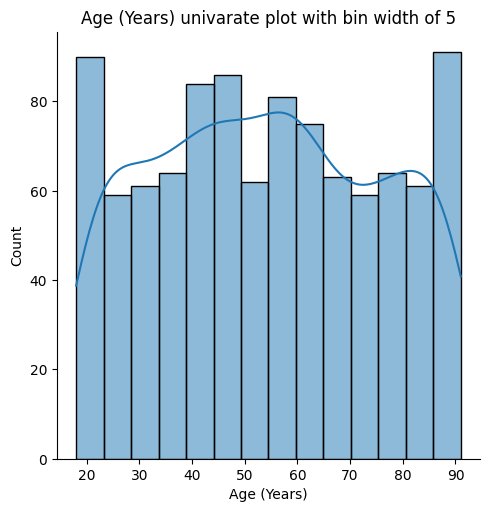

In [41]:
#2a. Univarate plot of the age column
Age_plot = univariate_plot(acw_df,'Age (Years)', bin_width=5)

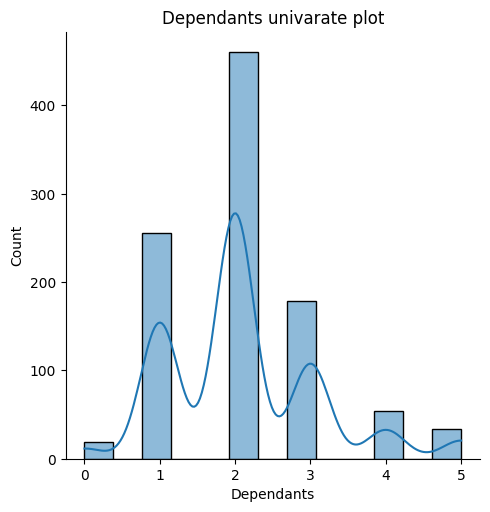

In [54]:
#Univarate plot of the dependant column before formatting the dependants column
Dependant_plot = univariate_plot(acw_df,'Dependants')

In [43]:
#the below line of code formats the dependants column by filling the empty cells in the dependants column with zero to fix the data errors
acw_df['Dependants'].fillna(0, inplace=True)

In [44]:
#checking to confirm the errors in the dependant column has been fixed
acw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address Street                  1000 non-null   object 
 1   Address City                    1000 non-null   object 
 2   Address Postcode                1000 non-null   object 
 3   Age (Years)                     1000 non-null   int64  
 4   Distance Commuted to Work (Km)  1000 non-null   float64
 5   Employer Company                754 non-null    object 
 6   Credit Card Start Date          1000 non-null   object 
 7   Credit Card Expiry Date         1000 non-null   object 
 8   Credit Card Number              1000 non-null   int64  
 9   Credit Card CVV                 1000 non-null   int64  
 10  Dependants                      1000 non-null   float64
 11  First Name                      1000 non-null   object 
 12  Bank IBAN                       100

<class 'seaborn.axisgrid.FacetGrid'>


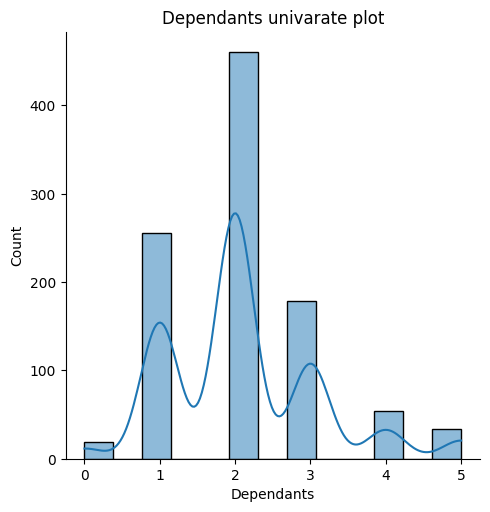

In [55]:
#2b. This is a new univarate plot of the dependant column after fixing all the errors
Dependant_update_plot = univariate_plot(acw_df,'Dependants')
print(type(Dependant_update_plot))

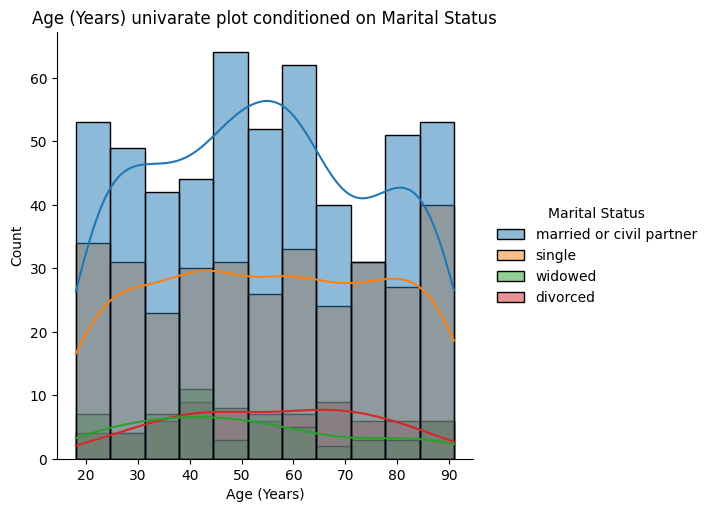

In [46]:
#This is another univarate plot of the age column, however the bin is defaulted and the plot is conditioned by the marital status column
Age_default_bin_plot = univariate_plot(acw_df,'Age (Years)', hue_column='Marital Status')

<br>

## Task 3: Creating Multivariate Plots

### Step 1: Write a function to create a multivariate plot

In [47]:
#This function creates a multivariate plot
#The function defaults to scatter plot if plot type is not specified
def multivariate_plot(df, x_col, y_col, hue_column=None):
    """
    Function creates a multivariate scatter plot.

    Parameters:
    - df: pandas DataFrame, the input dataset
    - x_col: str, the column for the x-axis
    - y_col: str, the column for the y-axis
    - hue_column: str, optional, the column for conditional coloring

    Returns:
    - The seaborn FacetGrid object
    """
    #This block of code runs if the hue column is specified
    if hue_column is not None:
        multi_plot = sns.relplot(data=df, x=x_col, y=y_col, hue=hue_column)
        multi_plot.set(title=f"Multivariate plot of {x_col} against {y_col} conditioned on {hue_column}")
    
    #This block of code runs if the hue column is not specified
    else:
        multi_plot = sns.relplot(data=df, x=x_col, y=y_col)
        multi_plot.set(title=f"Multivariate plot of {x_col} against {y_col}")
        
    return multi_plot

### Step 2: Display each of the multivariate plots

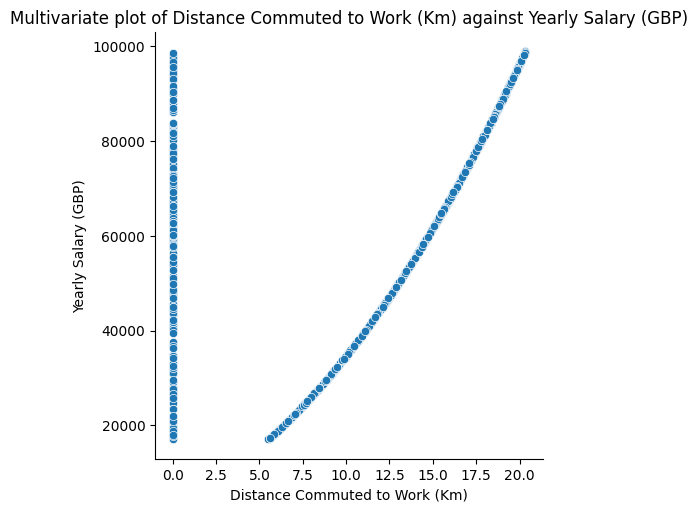

In [48]:
#3a. Multivariate plot of coommuted distance agaist salary using the multivariate plot function
dist_vs_salary_plot = multivariate_plot(acw_df, 'Distance Commuted to Work (Km)' , 'Yearly Salary (GBP)')

<br>

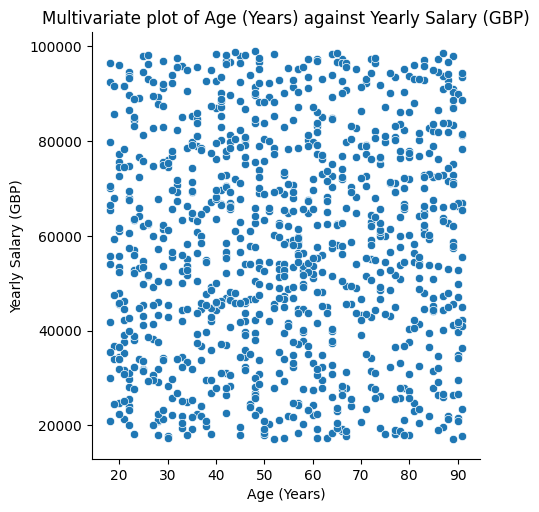

In [49]:
#3b Display a multivariate plot of age against salary using the multivariate plot function

age_against_salary_plot = multivariate_plot(acw_df, 'Age (Years)' , 'Yearly Salary (GBP)')

<br>

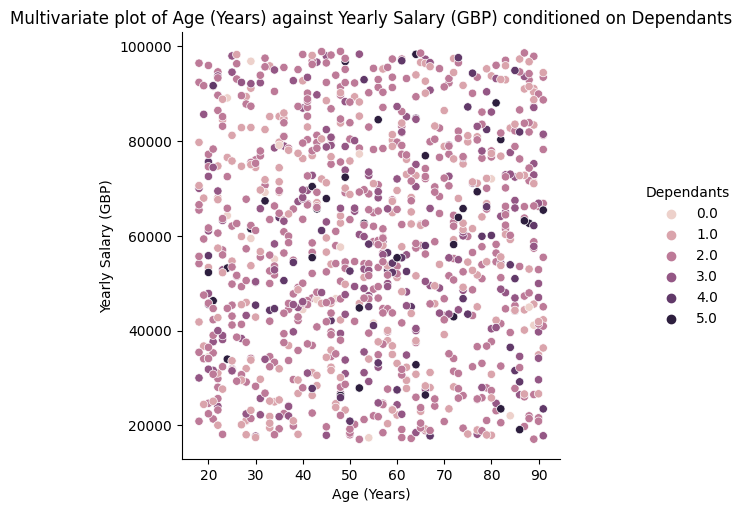

In [50]:
#3c Display a multivariate plot of age against salary conditioned by dependants, also using the multivariate plot function

age_against_salary_hue_plot = multivariate_plot(acw_df, 'Age (Years)' , 'Yearly Salary (GBP)', hue_column='Dependants')

<br>
<br>

## Task 4: Save all the plots

In [51]:
figures_to_save = {}
figures_to_save["./Age_plot.png"] = Age_plot
figures_to_save["./Dependant_update_plot.png"] = Dependant_update_plot
figures_to_save["./dist_vs_salary.png"] = dist_vs_salary_plot
figures_to_save["./age_against_salary.png"] = age_against_salary_plot
figures_to_save["./Age_default_bin_plot.png"] = Age_default_bin_plot
figures_to_save["./age_against_salary_hue.png"] = age_against_salary_hue_plot
Age_default_bin_plot
for key, value in figures_to_save.items():
    value.savefig(key)